In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = 'result_comma.csv'
df = pd.read_csv(data)
df.head()

,Unnamed: 0,date,Дата_x,Посока,Рег. номер,Държава,Скорост,Клас,Лента,Дължина,...,Средна скорост на вятър в m/s,Средна посока на вятър в °,Темп. на повърхността на настилката в °C,Точка на замръзване в °C,Състояние на повърхността,Предупреждение за състояние на повърхността,Височина на водния стълб в µm,Темп. под повърхн. на дълб. 5 см в °C,Макс. скорост на вятър в m/s,Посока на вятъра при макс. скорост в °
0,0,2023-03-29 12:00:00,29.3.2023 г. 12:00:06,Околовръстно,-6295152506763664080,NaN,56.0,1.0,L6,2168.0,...,4.6,326.0,14.3,0.0,DR,NaN,0.0,11.2,8.7,3.0
1,1,2023-03-29 12:00:00,29.3.2023 г. 12:00:07,Център,140823469443,NaN,50.0,0.0,L2,2200.0,...,4.6,326.0,14.3,0.0,DR,NaN,0.0,11.2,8.7,3.0
2,2,2023-03-29 12:00:00,29.3.2023 г. 12:00:08,Околовръстно,140823469443,NaN,43.0,1.0,L5,3400.0,...,4.6,326.0,14.3,0.0,DR,NaN,0.0,11.2,8.7,3.0
3,3,2023-03-29 12:00:00,29.3.2023 г. 12:00:10,Околовръстно,140823469443,NaN,50.0,1.0,L5,9947.0,...,4.6,326.0,14.3,0.0,DR,NaN,0.0,11.2,8.7,3.0
4,4,2023-03-29 12:00:00,29.3.2023 г. 12:00:11,Околовръстно,140823469443,NaN,48.0,1.0,L6,3600.0,...,4.6,326.0,14.3,0.0,DR,NaN,0.0,11.2,8.7,3.0


In [4]:
selected_columns = ['Лента']
file_lenta = df[selected_columns]

In [5]:
lenta = file_lenta[file_lenta['Лента'] == 'L4'].count()
lenta

Лента    49990
dtype: int64

In [6]:
columns = ['Тегло', 'Скорост']
data_selected = df[df['Лента'] == 'L4'][columns]
data_selected

,Тегло,Скорост
22,0.0,54.0
24,0.0,56.0
26,0.0,57.0
65,0.0,47.0
117,0.0,49.0
...,...,...
760475,0.0,50.0
760526,0.0,55.0
760692,0.0,59.0
761410,1613.0,50.0


In [7]:
data_selected=data_selected[data_selected['Тегло']>0]
data_selected


,Тегло,Скорост
15473,962.0,58.0
15498,912.0,48.0
15533,650.0,53.0
15534,1184.0,53.0
15535,10036.0,40.0
...,...,...
744970,5739.0,52.0
744973,833.0,43.0
745276,11605.0,47.0
745277,8697.0,46.0


In [8]:
missing_values = data_selected.isnull().sum()
print(missing_values)

Тегло      0
Скорост    0
dtype: int64


In [9]:
data_selected = data_selected.replace(0, np.nan)
data_selected.head()
data_selected.to_csv('data_without_IF.csv', index=False)

In [10]:
missing_values = data_selected.isnull().sum()
print(missing_values)

Тегло      0
Скорост    0
dtype: int64


In [11]:
from sklearn.ensemble import IsolationForest

# Създаване на модел за Isolation Forest
model = IsolationForest(random_state= 10,contamination=0.1)  # contamination е долята на аномалиите в данните

# Подготовка на данните X, които съдържат вашите данни
model.fit(data_selected)  # Трениране на модела
predictions = model.predict(data_selected)  # Предсказване на аномалиите


cleaned_df = data_selected[predictions == 1] 

In [12]:
cleaned_df

,Тегло,Скорост
15473,962.0,58.0
15498,912.0,48.0
15533,650.0,53.0
15534,1184.0,53.0
15586,919.0,48.0
...,...,...
744970,5739.0,52.0
744973,833.0,43.0
745276,11605.0,47.0
745277,8697.0,46.0


In [13]:
cleaned_df.to_csv('data_with_IF.csv', index=False)

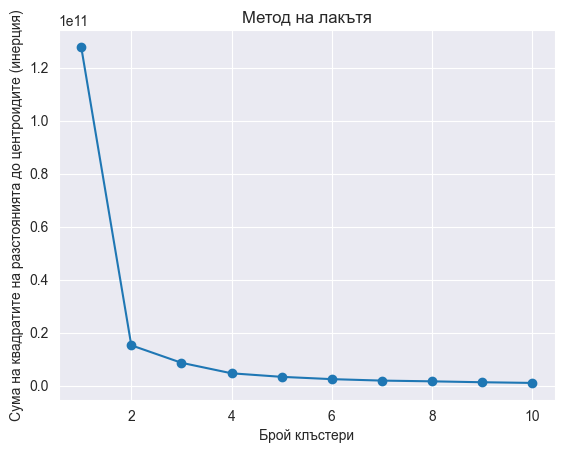

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Примерни данни
# предполагаме, че X е вашият набор от данни
X = cleaned_df

# Създаване на списък, в който ще съхраните стойности на вариацията за всяко k
variations = []

# Ползваме k от 1 до 10 за пример
for k in range(1, 11):
    # Създаване на k-means модел с k кластера
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    # Записване на вариацията за текущото k
    variations.append(kmeans.inertia_)

# Визуализация на метода на лакътя
plt.plot(range(1, 11), variations, marker='o')
plt.xlabel('Брой клъстери')
plt.ylabel('Сума на квадратите на разстоянията до центроидите (инерция)')
plt.title('Метод на лакътя')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
numeric_columns = cleaned_df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data_standartized = scaler.fit_transform(cleaned_df[numeric_columns])
data_standartized

array([[-0.37776532,  0.91808977],
       [-0.4016831 , -0.6985337 ],
       [-0.52701227,  0.10977803],
       ...,
       [ 4.71337327, -0.86019605],
       [ 3.3223152 , -1.02185839],
       [-0.06635583, -0.37520901]])

In [16]:
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(data_standartized)
labels = gmm.predict(data_standartized)

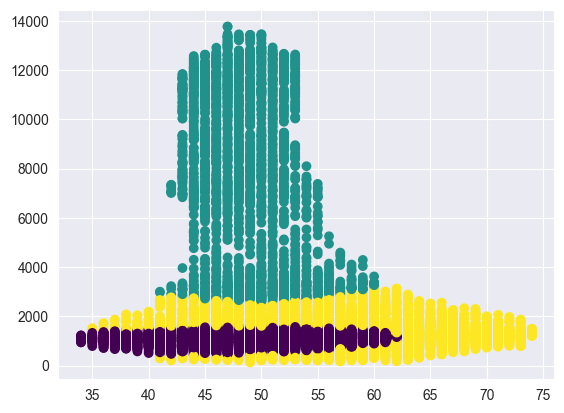

In [17]:
data_standartized=cleaned_df.copy()
data_standartized['Cluster']=labels
plt.scatter(data_standartized['Скорост'],data_standartized['Тегло'],c=data_standartized['Cluster'],cmap= 'viridis')
plt.show()